In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
df = pd.read_csv('data_C.csv')

# Exploratory Data Analysis

In [44]:
df.shape

(41258, 15)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41258 non-null  int64  
 1   id               41258 non-null  int64  
 2   CustomerId       41258 non-null  int64  
 3   Surname          41258 non-null  object 
 4   CreditScore      41246 non-null  float64
 5   Geography        41258 non-null  object 
 6   Gender           41258 non-null  object 
 7   Age              41258 non-null  float64
 8   Tenure           41258 non-null  int64  
 9   Balance          41258 non-null  float64
 10  NumOfProducts    41258 non-null  int64  
 11  HasCrCard        41258 non-null  int64  
 12  IsActiveMember   41258 non-null  int64  
 13  EstimatedSalary  41258 non-null  float64
 14  churn            41258 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


In [46]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,157138,15638646,Chinweike,628.0,Spain,Female,50.0,4,160133.08,1,1,1,653.53,0
1,1,116144,15695825,Onwumelu,710.0,Spain,Male,34.0,8,0.00,2,1,1,72993.73,0
2,2,145603,15592765,Marks,663.0,France,Female,23.0,8,125470.81,1,1,1,174536.17,0
3,3,79929,15807525,Onyemachukwu,644.0,Spain,Male,45.0,8,0.00,2,0,1,28690.90,0
4,4,52554,15611551,Hill,627.0,Spain,Male,23.0,5,0.00,2,1,0,134483.07,0


In [47]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [48]:
# Unique value in each column
for c in df:
    print(f'{c}: {df[c].nunique()}')
    print(df[c].unique())
    print()

Unnamed: 0: 41258
[    0     1     2 ... 41255 41256 41257]

id: 41258
[157138 116144 145603 ... 132494  31177 154294]

CustomerId: 13212
[15638646 15695825 15592765 ... 15692434 15794588 15696231]

Surname: 2272
['Chinweike' 'Onwumelu' 'Marks' ... 'Pagan' 'Wildman' 'Igwebuike']

CreditScore: 444
[628. 710. 663. 644. 627. 754. 616. 477. 526. 597. 745. 705. 648. 718.
 619. 738. 576. 438. 792. 646. 579. 652. 494. 602. 679. 850. 733. 803.
 769. 645. 635. 714. 634. 651. 551. 739. 668. 517. 709. 547. 702. 712.
 540. 611. 834. 682. 683. 691. 755. 641. 764. 765. 583. 511. 716. 676.
 565. 460. 711. 643. 704. 621. 592. 695. 677. 743. 622. 749. 593. 678.
 752. 697. 633. 584. 666. 767. 581. 814. 647. 757. 667. 690. 638. 632.
 516. 637. 613. 624. 686. 721. 594. 588. 656. 573. 715. 732. 655. 670.
 788. 730. 556. 658. 590. 726. 653. 629. 489. 604. 729. 485. 614. 684.
 707. 773. 717. 609. 615. 587. 603. 585. 687. 636. 544. 630. 833. 562.
 829. 535. 564. 598. 681. 612. 751. 762. 831. 794. 591. 815. 54

In [49]:
df.isna().sum()

Unnamed: 0          0
id                  0
CustomerId          0
Surname             0
CreditScore        12
Geography           0
Gender              0
Age                 0
Tenure              0
Balance             0
NumOfProducts       0
HasCrCard           0
IsActiveMember      0
EstimatedSalary     0
churn               0
dtype: int64

In [50]:
df.duplicated().sum()

0

# Feature Engineering

In [51]:
# Fill the Null Value in CreditScore with its mean
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace = True)

In [52]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

In [53]:
# Drop the 'Unnamed: 0' column because it's not relevant
df.drop('Unnamed: 0', axis=1, inplace=True)

In [54]:
# Drop the 'Surname' column
df.drop('Surname', axis=1, inplace=True)

In [55]:
# Encoding for object feature with LabelEncoder
from sklearn.preprocessing import LabelEncoder

labelEnc = LabelEncoder()
df['Geography'] = labelEnc.fit_transform(df['Geography'])
df['Gender'] = labelEnc.fit_transform(df['Gender'])

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41258 entries, 0 to 41257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               41258 non-null  int64  
 1   CustomerId       41258 non-null  int64  
 2   CreditScore      41258 non-null  float64
 3   Geography        41258 non-null  int32  
 4   Gender           41258 non-null  int32  
 5   Age              41258 non-null  float64
 6   Tenure           41258 non-null  int64  
 7   Balance          41258 non-null  float64
 8   NumOfProducts    41258 non-null  int64  
 9   HasCrCard        41258 non-null  int64  
 10  IsActiveMember   41258 non-null  int64  
 11  EstimatedSalary  41258 non-null  float64
 12  churn            41258 non-null  int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 3.8 MB


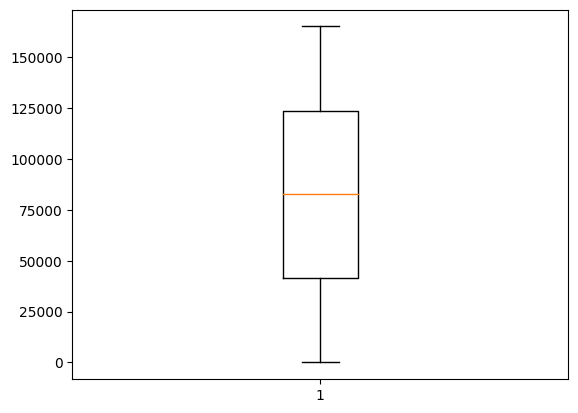

id


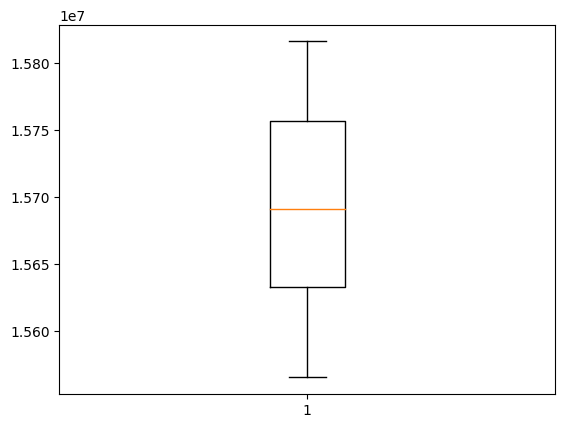

CustomerId


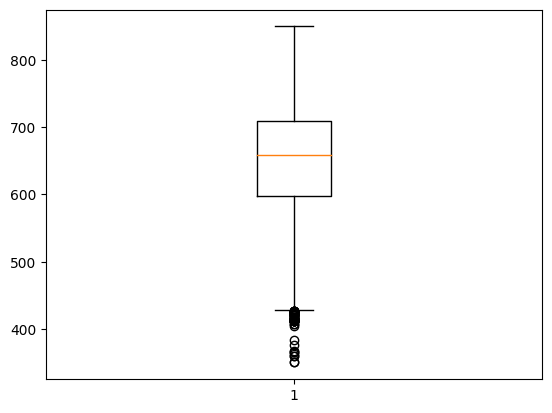

CreditScore


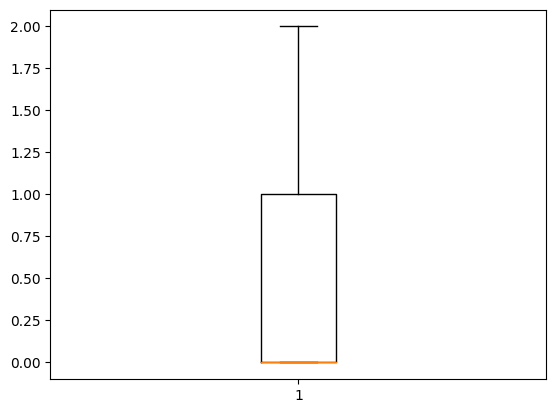

Geography


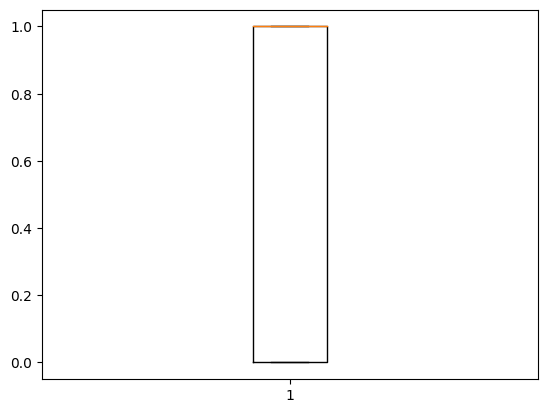

Gender


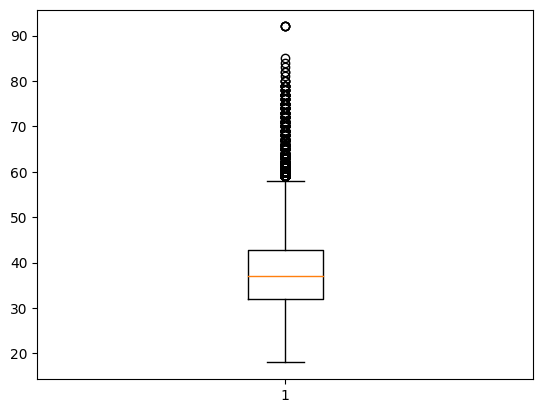

Age


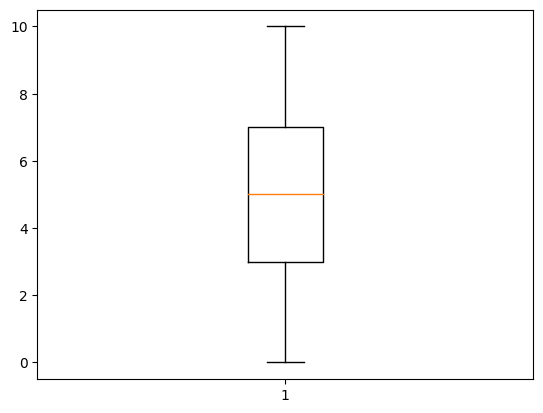

Tenure


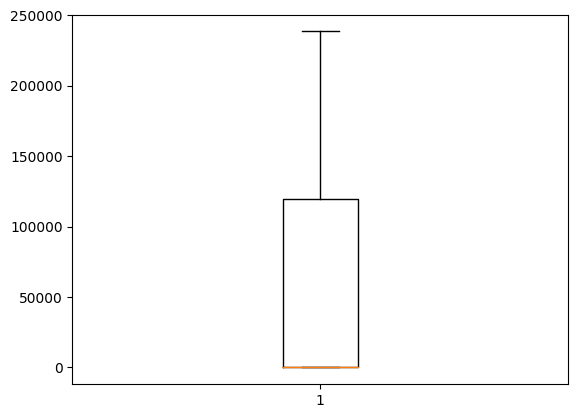

Balance


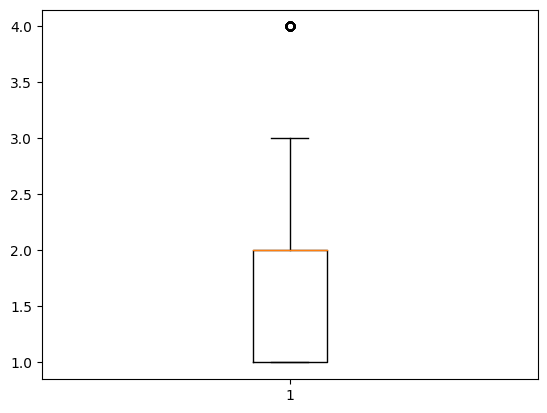

NumOfProducts


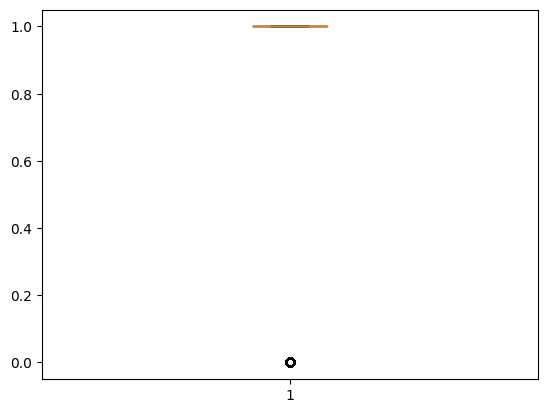

HasCrCard


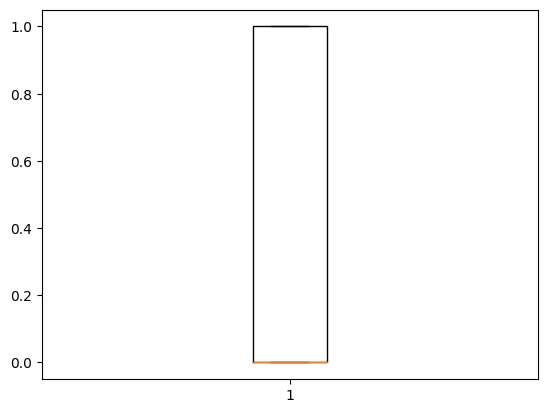

IsActiveMember


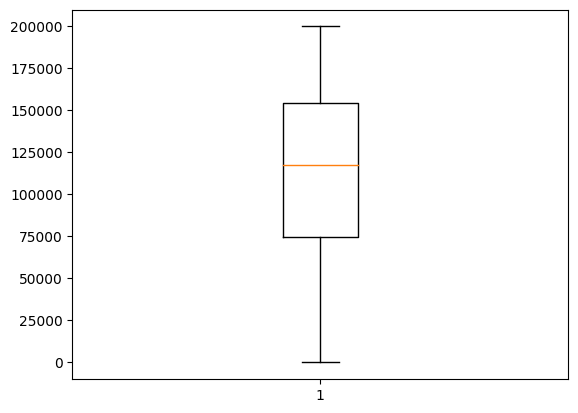

EstimatedSalary


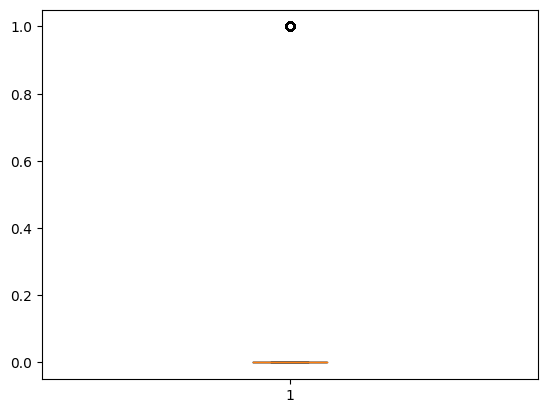

churn


In [57]:
# Check Outlier
for col in df:
    plt.boxplot(df[col])
    plt.show()
    print(col)

In [58]:
# Remove Outlier in feature CreditScore and Age
#store outlier value
mean = df['CreditScore'].mean()
std = df['CreditScore'].std()
Tmax = mean + (3 * std)
Tmin = mean - (3 * std)
Outlier = df[(df['CreditScore'] < Tmin) | (df['CreditScore'] > Tmax)]['CreditScore'].values
print(Outlier)
print(len(Outlier))

[415. 413. 414. 363. 367. 412. 413. 411. 383. 415. 412. 408. 416. 411.
 411. 416. 411. 414. 365. 411. 350. 365. 376. 408. 350. 359. 405. 411.
 414. 412. 411. 359.]
32


In [59]:
df = df[~df['CreditScore'].isin(Outlier)]

In [60]:
mean = df['Age'].mean()
std = df['Age'].std()
Tmax = mean + (3 * std)
Tmin = mean - (3 * std)
Outlier = df[(df['Age'] < Tmin) | (df['Age'] > Tmax)]['Age'].values
print(Outlier)
print(len(Outlier))

[66. 66. 77. 65. 67. 71. 65. 79. 66. 69. 67. 65. 80. 67. 74. 65. 67. 72.
 67. 69. 71. 66. 67. 67. 70. 66. 66. 67. 80. 67. 67. 74. 67. 66. 69. 71.
 67. 70. 67. 69. 71. 70. 66. 66. 83. 67. 72. 78. 79. 70. 77. 68. 66. 66.
 66. 69. 67. 67. 67. 66. 66. 71. 70. 70. 77. 67. 66. 73. 68. 66. 72. 66.
 79. 65. 77. 65. 66. 67. 67. 75. 65. 73. 69. 69. 67. 65. 71. 69. 68. 72.
 67. 78. 71. 71. 67. 75. 73. 67. 71. 68. 66. 69. 76. 74. 67. 77. 67. 70.
 66. 71. 65. 77. 71. 69. 77. 67. 67. 71. 82. 66. 65. 78. 66. 74. 71. 66.
 66. 69. 66. 68. 66. 67. 66. 67. 92. 71. 71. 71. 66. 71. 65. 66. 71. 65.
 66. 72. 74. 66. 72. 69. 71. 66. 66. 71. 68. 74. 66. 92. 68. 67. 67. 69.
 66. 68. 69. 71. 72. 69. 72. 71. 70. 67. 69. 71. 71. 68. 74. 66. 72. 67.
 71. 73. 66. 65. 67. 67. 65. 66. 73. 67. 65. 67. 67. 68. 66. 70. 65. 66.
 70. 71. 66. 67. 77. 67. 66. 74. 71. 67. 77. 72. 66. 71. 66. 67. 75. 65.
 67. 67. 68. 71. 67. 66. 66. 66. 72. 68. 65. 72. 69. 74. 67. 77. 74. 66.
 71. 66. 68. 66. 67. 67. 66. 66. 71. 71. 72. 67. 66

In [61]:
df = df[~df['Age'].isin(Outlier)]

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40705 entries, 0 to 41257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               40705 non-null  int64  
 1   CustomerId       40705 non-null  int64  
 2   CreditScore      40705 non-null  float64
 3   Geography        40705 non-null  int32  
 4   Gender           40705 non-null  int32  
 5   Age              40705 non-null  float64
 6   Tenure           40705 non-null  int64  
 7   Balance          40705 non-null  float64
 8   NumOfProducts    40705 non-null  int64  
 9   HasCrCard        40705 non-null  int64  
 10  IsActiveMember   40705 non-null  int64  
 11  EstimatedSalary  40705 non-null  float64
 12  churn            40705 non-null  int64  
dtypes: float64(4), int32(2), int64(7)
memory usage: 4.0 MB


In [63]:
#Convert all feature to int
columns_toConvert = ['CreditScore','Age','Balance','EstimatedSalary']
df[columns_toConvert] = df[columns_toConvert].astype(int)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40705 entries, 0 to 41257
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               40705 non-null  int64
 1   CustomerId       40705 non-null  int64
 2   CreditScore      40705 non-null  int32
 3   Geography        40705 non-null  int32
 4   Gender           40705 non-null  int32
 5   Age              40705 non-null  int32
 6   Tenure           40705 non-null  int64
 7   Balance          40705 non-null  int32
 8   NumOfProducts    40705 non-null  int64
 9   HasCrCard        40705 non-null  int64
 10  IsActiveMember   40705 non-null  int64
 11  EstimatedSalary  40705 non-null  int32
 12  churn            40705 non-null  int64
dtypes: int32(6), int64(7)
memory usage: 3.4 MB


# Training Machine Learning Model

## Splitting data into training and testing

In [65]:
input_df = df.drop('churn',axis=1)
output_df = df['churn']

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_df, output_df, test_size = 0.2, random_state = 42)

## Classification using Random Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)
y_predict=RF_class.predict(x_test)

In [68]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_predict, target_names=['0','1']))


Classification Report

              precision    recall  f1-score   support

           0       0.84      0.98      0.91      6368
           1       0.84      0.34      0.49      1773

    accuracy                           0.84      8141
   macro avg       0.84      0.66      0.70      8141
weighted avg       0.84      0.84      0.82      8141



In [69]:
import pickle as pkl
filename = 'Best_model.pkl'
pkl.dump(RF_class, open(filename, 'wb'))